In [106]:
# Libraries
from bs4 import BeautifulSoup, Comment
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import urllib
import urllib2
import os
import re
import scipy.stats as stats
import unicodedata
import datetime
import requests
import requests_cache
requests_cache.install_cache('demo_cache')
%matplotlib inline

## Scrape each team's "per game" stats, 2003-2017

In [2]:
link = 'https://www.basketball-reference.com/teams/BOS/2017.html'
page = urllib.urlopen(link).read()
soup = BeautifulSoup(page, "lxml")

In [14]:
tables = soup.find_all('table')

In [18]:
tables[0]

<table class="sortable stats_table" data-cols-to-freeze="2" id="roster"><caption>Roster Table</caption>\n<colgroup><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col></colgroup>\n<thead>\n<tr>\n<th aria-label="Uniform Number" class=" poptip sort_default_asc center" data-stat="number" data-tip="Uniform Number" scope="col">No.</th>\n<th aria-label="Player" class=" poptip sort_default_asc center" data-stat="player" scope="col">Player</th>\n<th aria-label="Position" class=" poptip sort_default_asc center" data-stat="pos" data-tip="Position" scope="col">Pos</th>\n<th aria-label="Height" class=" poptip sort_default_asc right" data-stat="height" data-tip="Height" scope="col">Ht</th>\n<th aria-label="Weight" class=" poptip sort_default_asc right" data-stat="weight" data-tip="Weight" scope="col">Wt</th>\n<th aria-label="Birth Date" class=" poptip sort_default_asc left" data-stat="birth_date" scope="col">Birth Date</th>\n<th aria-label="\xa0" class

In [11]:
table = soup.find('table', {'id': 'per_game'})

In [12]:
print table

None


In [23]:
table_comment = soup.find('div', id = 'all_per_game').findAll(text=lambda text:isinstance(text, Comment))[0]
table = BeautifulSoup(table_comment,'lxml')

In [24]:
table

<html><body><div class="table_outer_container">\n<div class="overthrow table_container" id="div_per_game">\n<table class="sortable stats_table" data-cols-to-freeze="2" id="per_game"><caption>Per Game Table</caption>\n<colgroup><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col></colgroup>\n<thead>\n<tr>\n<th aria-label="Rank" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>\n<th aria-label=" " class=" poptip sort_default_asc center" data-stat="player" scope="col"></th>\n<th aria-label="Age of Player at the start of February 1st of that season." class=" poptip sort_default_asc center" data-stat="age" data-tip="Age of Player at the start of February 1st of th

In [36]:
rows = table.find_all('tr')

In [33]:
len(trs[3])

28

In [37]:
tds = rows[1].find_all('td')

In [38]:
tds

[<td class="left " csk="Thomas,Isaiah" data-append-csv="thomais02" data-stat="player"><a href="/players/t/thomais02.html">Isaiah Thomas</a></td>,
 <td class="center " data-stat="age">27</td>,
 <td class="right " data-stat="g"><a href="/players/t/thomais02/gamelog/2017/">76</a></td>,
 <td class="right " data-stat="gs">76</td>,
 <td class="right " data-stat="mp_per_g">33.8</td>,
 <td class="right " data-stat="fg_per_g">9.0</td>,
 <td class="right " data-stat="fga_per_g">19.4</td>,
 <td class="right " data-stat="fg_pct">.463</td>,
 <td class="right " data-stat="fg3_per_g">3.2</td>,
 <td class="right " data-stat="fg3a_per_g">8.5</td>,
 <td class="right " data-stat="fg3_pct">.379</td>,
 <td class="right " data-stat="fg2_per_g">5.8</td>,
 <td class="right " data-stat="fg2a_per_g">10.9</td>,
 <td class="right " data-stat="fg2_pct">.528</td>,
 <td class="right " data-stat="efg_pct">.546</td>,
 <td class="right " data-stat="ft_per_g">7.8</td>,
 <td class="right " data-stat="fta_per_g">8.5</td>,

In [51]:
link[43:46]

'BOS'

In [60]:
tds[2].text

u'76'

In [57]:
tds

[<td class="left " csk="Thomas,Isaiah" data-append-csv="thomais02" data-stat="player"><a href="/players/t/thomais02.html">Isaiah Thomas</a></td>,
 <td class="center " data-stat="age">27</td>,
 <td class="right " data-stat="g"><a href="/players/t/thomais02/gamelog/2017/">76</a></td>,
 <td class="right " data-stat="gs">76</td>,
 <td class="right " data-stat="mp_per_g">33.8</td>,
 <td class="right " data-stat="fg_per_g">9.0</td>,
 <td class="right " data-stat="fga_per_g">19.4</td>,
 <td class="right " data-stat="fg_pct">.463</td>,
 <td class="right " data-stat="fg3_per_g">3.2</td>,
 <td class="right " data-stat="fg3a_per_g">8.5</td>,
 <td class="right " data-stat="fg3_pct">.379</td>,
 <td class="right " data-stat="fg2_per_g">5.8</td>,
 <td class="right " data-stat="fg2a_per_g">10.9</td>,
 <td class="right " data-stat="fg2_pct">.528</td>,
 <td class="right " data-stat="efg_pct">.546</td>,
 <td class="right " data-stat="ft_per_g">7.8</td>,
 <td class="right " data-stat="fta_per_g">8.5</td>,

In [107]:
def scrape_per_game_data(link):
    page = urllib.urlopen(link).read()
    soup = BeautifulSoup(page, "lxml")
    table_comment = soup.find('div', id = 'all_per_game').findAll(text=lambda text:isinstance(text, Comment))[0]
    table = BeautifulSoup(table_comment,'lxml')
    
    #yr = link[49:53]
    #tabs = soup.findAll('table')
    #table = tabs[0]
    
    rows = table.find_all('tr')
    
    season_log = pd.DataFrame()
    for row in rows:
        if len(row) == 28:
            tds = row.find_all('td')
            info = row.find_all('a')[0]
            player = info.text
            player_id = info.get('href')[11:20]
            season_log = season_log.append({'player': player,
                                            'yr': int(link[47:51]),
                                            'id': player_id,
                                            'team': link[43:46],
                                            'G': int(tds[2].text),
                                            'mp_per_g': float(tds[4].text),
                                            'fga_per_g': float(tds[6].text),
                                            'fta_per_g': float(tds[16].text),
                                            'tov_per_g': float(tds[24].text)},
                                        ignore_index=True)
    return season_log

In [75]:
df = scrape_per_game_data(link)

AttributeError: 'NoneType' object has no attribute 'findAll'

In [ ]:
df

In [67]:
usg_pct = [(mp**2 * 100 * ((fga + 0.44*fta + tov)) * (float(sum(df['mp_per_g']))/5)) / 
            (mp * (sum(df['fga_per_g']) + 0.44*sum(df['fta_per_g']) + sum(df['tov_per_g'])))
for fga, fta, tov, mp in zip(df['fga_per_g'], df['fta_per_g'], df['tov_per_g'], df['mp_per_g'])]

In [69]:
[u/sum(usg_pct) for u in usg_pct]

[0.2558347534833213,
 0.16029959766599353,
 0.11741929655567962,
 0.13552963745353655,
 0.1144999793995091,
 0.05266314159003342,
 0.036198855779873314,
 0.03515179060283806,
 0.03291164770429413,
 0.018994469614392658,
 0.01927995857025357,
 0.01157700901181021,
 0.00494972021265309,
 0.0033726446723453983,
 0.0013174976834660459]

In [174]:
teams = ['ATL','BOS','BRK','CHI','CHO','CLE','DET','IND','MIA','MIL','NYK','ORL',
         'PHI','TOR','WAS','DAL','DEN','GSW','HOU','LAC','LAL','MEM','MIN','NOP','OKC',
         'PHO','POR','SAC','SAS','UTA','NOH','CHH','CHA','SEA','NJN','NOK']
yrs = range(2003,2018)

links = ['https://www.basketball-reference.com/teams/' + team + '/' + str(yr) + '.html'
         for yr in yrs for team in teams]

In [175]:
links[:5]

['https://www.basketball-reference.com/teams/ATL/2003.html',
 'https://www.basketball-reference.com/teams/BOS/2003.html',
 'https://www.basketball-reference.com/teams/BRK/2003.html',
 'https://www.basketball-reference.com/teams/CHI/2003.html',
 'https://www.basketball-reference.com/teams/CHO/2003.html']

In [176]:
links[0][47:51]

'2003'

In [209]:
links2 = ['https://www.basketball-reference.com/teams/LAL/' + str(yr) + '.html'
         for yr in yrs]

In [210]:
for link in links2:
    try: # need to open with try
        page = urllib2.urlopen(link)
    except urllib2.HTTPError as e:
        if e.getcode() == 404: # check the return code
            continue 
    team = link[43:46]
    yr = link[47:51]
    df = scrape_per_game_data(link)
    df.to_excel('data/per_game_data/pg_data_LAL_' + yr + '.xlsx')

In [178]:
df = pd.read_excel('data/per_game_data/pg_data_BOS_2017.xlsx')

In [179]:
df[df['G'] > 10]

,G,fga_per_g,fta_per_g,id,mp_per_g,player,team,tov_per_g,yr
0,76,19.4,8.5,thomais02,33.8,Isaiah Thomas,BOS,2.8,2017
1,55,14.1,1.7,bradlav01,33.4,Avery Bradley,BOS,1.6,2017
2,72,10.0,3.0,crowdja01,32.4,Jae Crowder,BOS,1.1,2017
3,68,11.8,2.0,horfoal01,32.3,Al Horford,BOS,1.7,2017
4,79,9.5,3.2,smartma01,30.4,Marcus Smart,BOS,2.0,2017
5,75,6.8,1.6,olynyke01,20.5,Kelly Olynyk,BOS,1.3,2017
6,80,4.6,1.3,johnsam01,20.1,Amir Johnson,BOS,1.0,2017
7,78,5.4,1.6,brownja02,17.2,Jaylen Brown,BOS,0.9,2017
8,74,5.6,0.9,roziete01,17.1,Terry Rozier,BOS,0.6,2017
9,78,3.4,0.5,jerebjo01,15.8,Jonas Jerebko,BOS,0.5,2017


In [108]:
# Function for calculating usage rate for a team
# team_df: a dataframe of a single team's season statistics
# n: power to raise minutes to (n=0 is usage rate, n=1 is linearly scaled, etc.)
def calculate_usg_n(df, n):
    usg_pct = [(mp**n * 100 * ((fga + 0.44*fta + tov)) * (float(sum(df['mp_per_g']))/5)) / 
            (mp * (sum(df['fga_per_g']) + 0.44*sum(df['fta_per_g']) + sum(df['tov_per_g'])))
            for fga, fta, tov, mp in zip(df['fga_per_g'], df['fta_per_g'], df['tov_per_g'], df['mp_per_g'])]
    return usg_pct

In [109]:
# Take usage rates, normalize them (sum = 1), sort them
def get_norm_usg(usg):
    return sorted([u/sum(usg) for u in usg])

In [110]:
# Subset only the top k usages, renormalize them
def get_norm_top_k(n_usg, k):
    new_usg = n_usg[-k:]
    return get_norm_usg(new_usg)

In [8]:
usg = calculate_usg_n(df, 2)
# Normalize usage
n_usg = get_norm_usg(usg)
n_usg

NameError: name 'df' is not defined

In [9]:
# Get top 8 players, renormalize
n_usg_k = get_norm_top_k(n_usg, 8)
n_usg_k

NameError: name 'n_usg' is not defined

In [111]:
def get_gini_season(fname, k, n, games):
    team_df = pd.read_excel(fname)
    team_df = team_df[team_df['G'] > games]
    #print team_df[:5]
    usg = calculate_usg_n(team_df, n=n)
    #print usg
    n_usg = get_norm_usg(usg)
    n_usg_k = get_norm_top_k(n_usg, k=k)
    x = range(len(n_usg_k)+1)
    y1 = np.cumsum([0] + n_usg_k)
    y2 = [float(t)/(len(x)-1) for t in x]
    gini = 2*(np.trapz(y2) - np.trapz(y1))/(x[-1]*y1[-1]) * len(n_usg_k)/(len(n_usg_k)-1)
    return gini

In [126]:
fname = 'data/per_game_data/pg_data_BOS_2017.xlsx'
get_gini_season(fname, 9, 1, 10)

0.2879770854416655

In [127]:
fname[31:35]

'2017'

In [188]:
gini_log = pd.DataFrame()
path = 'data/per_game_data'
for end in os.listdir(path):
    if end.endswith(".xlsx"):
        fname = path + '/' + end
        #print fname
        team = fname[27:30]
        if ((team == 'CHA') | (team == 'CHO')):
            team = 'CHH'
        yr = int(fname[31:35])
        print team, yr
        gini = get_gini_season(fname, 9, 2, 10)
        gini_log = gini_log.append({
                            'team': team,
                            'season': yr,
                            'gini': gini},
                        ignore_index=True)  
    else:
        continue 

ATL 2003
ATL 2004
ATL 2005
ATL 2006
ATL 2007
ATL 2008
ATL 2009
ATL 2010
ATL 2011
ATL 2012
ATL 2013
ATL 2014
ATL 2015
ATL 2016
ATL 2017
BOS 2003
BOS 2004
BOS 2005
BOS 2006
BOS 2007
BOS 2008
BOS 2009
BOS 2010
BOS 2011
BOS 2012
BOS 2013
BOS 2014
BOS 2015
BOS 2016
BOS 2017
BRK 2013
BRK 2014
BRK 2015
BRK 2016
BRK 2017
CHH 2005
CHH 2006
CHH 2007
CHH 2008
CHH 2009
CHH 2010
CHH 2011
CHH 2012
CHH 2013
CHH 2014
CHI 2003
CHI 2004
CHI 2005
CHI 2006
CHI 2007
CHI 2008
CHI 2009
CHI 2010
CHI 2011
CHI 2012
CHI 2013
CHI 2014
CHI 2015
CHI 2016
CHI 2017
CHH 2015
CHH 2016
CHH 2017
CLE 2003
CLE 2004
CLE 2005
CLE 2006
CLE 2007
CLE 2008
CLE 2009
CLE 2010
CLE 2011
CLE 2012
CLE 2013
CLE 2014
CLE 2015
CLE 2016
CLE 2017
DAL 2003
DAL 2004
DAL 2005
DAL 2006
DAL 2007
DAL 2008
DAL 2009
DAL 2010
DAL 2011
DAL 2012
DAL 2013
DAL 2014
DAL 2015
DAL 2016
DAL 2017
DEN 2003
DEN 2004
DEN 2005
DEN 2006
DEN 2007
DEN 2008
DEN 2009
DEN 2010
DEN 2011
DEN 2012
DEN 2013
DEN 2014
DEN 2015
DEN 2016
DEN 2017
DET 2003
DET 2004
DET 2005
D

In [189]:
gini_log.to_excel('data/gini_per_game_avg.xlsx')

## Make Graph

In [190]:
gini_log = pd.read_excel('data/gini_per_game_avg.xlsx')
gini_log['team'] = ['NOH' if team == 'NOK' else team for team in gini_log['team']]

In [191]:
s_res = pd.read_excel('data/nba_results.xlsx')
s_res.head()

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs
0,Boston Celtics,53,29,0.646,48,34,108.0,105.4,2017,BOS,3
1,Cleveland Cavaliers,51,31,0.622,49,33,110.3,107.2,2017,CLE,4
2,Toronto Raptors,51,31,0.622,52,30,106.9,102.6,2017,TOR,2
3,Washington Wizards,49,33,0.598,46,36,109.2,107.4,2017,WAS,2
4,Atlanta Hawks,43,39,0.524,39,43,103.2,104.0,2017,ATL,1


In [192]:
s_res = s_res[s_res['yr'] >= 2003]

In [193]:
teams = ['CHH' if ((team == 'CHA') | (team == 'CHO')) else team for team in s_res['abbr']]

In [194]:
s_res['abbr'] = teams

In [195]:
gini_lst = []
for i in range(len(s_res)):
    print i, s_res.iloc[i].abbr
    temp = gini_log[(gini_log['team'] == str(s_res.iloc[i].abbr)) & (gini_log['season'] == s_res.iloc[i].yr)]
    #print temp
    gini_lst.append(temp['gini'].values[0])

0 BOS
1 CLE
2 TOR
3 WAS
4 ATL
5 MIL
6 IND
7 CHI
8 MIA
9 DET
10 CHH
11 NYK
12 ORL
13 PHI
14 BRK
15 GSW
16 SAS
17 HOU
18 UTA
19 LAC
20 OKC
21 MEM
22 POR
23 DEN
24 NOP
25 DAL
26 SAC
27 MIN
28 LAL
29 PHO
30 CLE
31 TOR
32 MIA
33 ATL
34 CHH
35 BOS
36 IND
37 DET
38 CHI
39 WAS
40 ORL
41 MIL
42 NYK
43 BRK
44 PHI
45 GSW
46 SAS
47 OKC
48 LAC
49 POR
50 DAL
51 MEM
52 HOU
53 UTA
54 DEN
55 SAC
56 NOP
57 MIN
58 PHO
59 LAL
60 TOR
61 BOS
62 BRK
63 PHI
64 NYK
65 CLE
66 CHI
67 MIL
68 IND
69 DET
70 ATL
71 WAS
72 MIA
73 CHH
74 ORL
75 POR
76 OKC
77 UTA
78 DEN
79 MIN
80 GSW
81 LAC
82 PHO
83 SAC
84 LAL
85 HOU
86 MEM
87 SAS
88 DAL
89 NOP
90 TOR
91 BRK
92 NYK
93 BOS
94 PHI
95 IND
96 CHI
97 CLE
98 DET
99 MIL
100 MIA
101 WAS
102 CHH
103 ATL
104 ORL
105 OKC
106 POR
107 MIN
108 DEN
109 UTA
110 LAC
111 GSW
112 PHO
113 SAC
114 LAL
115 SAS
116 HOU
117 MEM
118 DAL
119 NOP
120 NYK
121 BRK
122 BOS
123 PHI
124 TOR
125 IND
126 CHI
127 MIL
128 DET
129 CLE
130 MIA
131 ATL
132 WAS
133 CHH
134 ORL
135 OKC
136 DEN
137 UTA
138 PO

In [196]:
s_res['gini'] = gini_lst

In [197]:
s_res.head()

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs,gini
0,Boston Celtics,53,29,0.646,48,34,108.0,105.4,2017,BOS,3,0.406842
1,Cleveland Cavaliers,51,31,0.622,49,33,110.3,107.2,2017,CLE,4,0.420337
2,Toronto Raptors,51,31,0.622,52,30,106.9,102.6,2017,TOR,2,0.393567
3,Washington Wizards,49,33,0.598,46,36,109.2,107.4,2017,WAS,2,0.422566
4,Atlanta Hawks,43,39,0.524,39,43,103.2,104.0,2017,ATL,1,0.289632


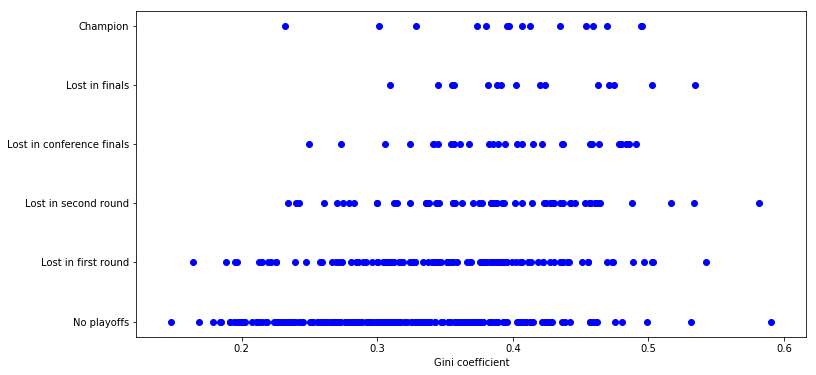

In [198]:
plt.figure(figsize=(12,6))
plt.scatter(s_res['gini'], s_res['playoffs'], c='b')
plt.yticks( range(6), ('No playoffs', 'Lost in first round', 'Lost in second round', 
                       'Lost in conference finals', 'Lost in finals', 'Champion') )
plt.xlabel('Gini coefficient')
plt.show()

In [199]:
s_res_sort = s_res.sort_values(by=['gini'])

In [200]:
df10 = s_res_sort.iloc[int(len(s_res_sort) * 0) : int(len(s_res_sort) * .10)]
df20 = s_res_sort.iloc[int(len(s_res_sort) * .10) : int(len(s_res_sort) * .20)]
df30 = s_res_sort.iloc[int(len(s_res_sort) * .20) : int(len(s_res_sort) * .30)]
df40 = s_res_sort.iloc[int(len(s_res_sort) * .30) : int(len(s_res_sort) * .40)]
df50 = s_res_sort.iloc[int(len(s_res_sort) * .40) : int(len(s_res_sort) * .50)]
df60 = s_res_sort.iloc[int(len(s_res_sort) * .50) : int(len(s_res_sort) * .60)]
df70 = s_res_sort.iloc[int(len(s_res_sort) * .60) : int(len(s_res_sort) * .70)]
df80 = s_res_sort.iloc[int(len(s_res_sort) * .70) : int(len(s_res_sort) * .80)]
df90 = s_res_sort.iloc[int(len(s_res_sort) * .80) : int(len(s_res_sort) * .90)]
df100 = s_res_sort.iloc[int(len(s_res_sort) * .90) : int(len(s_res_sort) * 1)]

In [201]:
print float(sum(df10['playoffs'] == 5))/len(df10)
print float(sum(df20['playoffs'] == 5))/len(df20)
print float(sum(df30['playoffs'] == 5))/len(df30)
print float(sum(df40['playoffs'] == 5))/len(df40)
print float(sum(df50['playoffs'] == 5))/len(df50)
print float(sum(df60['playoffs'] == 5))/len(df60)
print float(sum(df70['playoffs'] == 5))/len(df70)
print float(sum(df80['playoffs'] == 5))/len(df80)
print float(sum(df90['playoffs'] == 5))/len(df90)
print float(sum(df100['playoffs'] == 5))/len(df100)

0.0227272727273
0.0
0.0222222222222
0.0
0.0222222222222
0.0
0.0444444444444
0.0888888888889
0.0444444444444
0.0888888888889


In [202]:
df1 = s_res[s_res['gini'] < 0.2]
df2 = s_res[(s_res['gini'] > 0.2) & (s_res['gini'] < 0.3)]
df3 = s_res[(s_res['gini'] > 0.3) & (s_res['gini'] < 0.4)]
df4 = s_res[(s_res['gini'] > 0.4) & (s_res['gini'] < 0.5)]
df5 = s_res[s_res['gini'] > 0.5]

In [203]:
print float(sum(df1['playoffs'] == 5))/len(df1)
print float(sum(df2['playoffs'] == 5))/len(df2)
print float(sum(df3['playoffs'] == 5))/len(df3)
print float(sum(df4['playoffs'] == 5))/len(df4)
print float(sum(df5['playoffs'] == 5))/len(df5)

0.0
0.00877192982456
0.0292682926829
0.0776699029126
0.0


In [204]:
print float(sum(df1['playoffs'] == 5) + sum(df1['playoffs'] == 4))/len(df1)
print float(sum(df2['playoffs'] == 5) + sum(df2['playoffs'] == 4))/len(df2)
print float(sum(df3['playoffs'] == 5) + sum(df3['playoffs'] == 4))/len(df3)
print float(sum(df4['playoffs'] == 5) + sum(df4['playoffs'] == 4))/len(df4)
print float(sum(df5['playoffs'] == 5) + sum(df5['playoffs'] == 4))/len(df5)

0.0
0.00877192982456
0.0634146341463
0.135922330097
0.2


In [39]:
sum(df80['playoffs'] == 5)
len(df80)

45

In [29]:
sum(df10[df10['playoffs']]

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs,gini
388,Memphis Grizzlies,45,37,0.549,48,34,93.4,91.1,2005,MEM,1,0.164223
68,Indiana Pacers,38,44,0.463,42,40,97.3,97.0,2015,IND,0,0.168405
23,Denver Nuggets,40,42,0.488,42,40,111.7,111.2,2017,DEN,0,0.189646
13,Philadelphia 76ers,28,54,0.341,26,56,102.4,108.1,2017,PHI,0,0.196248
139,Minnesota Timberwolves,31,51,0.378,34,48,95.7,98.1,2013,MIN,0,0.219565
99,Milwaukee Bucks,15,67,0.183,20,62,95.5,103.7,2014,MIL,0,0.224602
408,Memphis Grizzlies,50,32,0.610,48,34,96.7,94.3,2004,MEM,1,0.225612
144,Phoenix Suns,25,57,0.305,23,59,95.2,101.6,2013,PHO,0,0.225750
61,Boston Celtics,40,42,0.488,41,41,101.4,101.2,2015,BOS,1,0.226953
132,Washington Wizards,29,53,0.354,33,49,93.2,95.8,2013,WAS,0,0.229165


In [42]:
df25 = s_res_sort.iloc[int(len(s_res_sort) * 0) : int(len(s_res_sort) * .25)]
df50 = s_res_sort.iloc[int(len(s_res_sort) * .25) : int(len(s_res_sort) * .50)]
df75 = s_res_sort.iloc[int(len(s_res_sort) * .50) : int(len(s_res_sort) * .75)]
df100 = s_res_sort.iloc[int(len(s_res_sort) * .75) : int(len(s_res_sort) * 1)]

In [43]:
print float(sum(df25['playoffs'] == 5))/len(df25)
print float(sum(df50['playoffs'] == 5))/len(df50)
print float(sum(df75['playoffs'] == 5))/len(df75)
print float(sum(df100['playoffs'] == 5))/len(df100)

0.00892857142857
0.00892857142857
0.0357142857143
0.0803571428571


In [46]:
np.corrcoef(s_res['playoffs'], s_res['gini'])

array([[ 1.        ,  0.33468087],
       [ 0.33468087,  1.        ]])

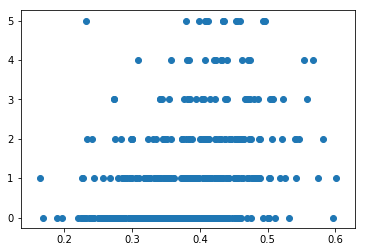

In [48]:
plt.scatter(s_res['gini'], s_res['playoffs'])
plt.show()

In [ ]:
np.corrcoef(s_res['playoffs'], [s_res['gini'])